# 재전송 공격

### 🔁 1. 재전송 공격 (Replay Attack)의 예시

**정의**: 유효한 인증 메시지를 도청한 후, 동일한 메시지를 재전송하여 인증받는 공격

### 💥 예시:

```
A → B : ID_A, password (또는 해시된 패스워드)
(공격자 E가 이 메시지를 캡처)

E → B : ID_A, password
(공격자는 해당 메시지를 다시 전송하여 A인 척함)
```

- 이 방식은 **비정형적인 challenge-response 구조 없이** 패스워드나 토큰만으로 인증하는 시스템에서 쉽게 발생함.
- 또는 Challenge-Response 구조라도 `nonce`나 `timestamp` 없이 항상 같은 응답을 내보내면 재전송 공격에 취약합니다.

---

### 🔐 2. Challenge-Response 인증 방식

**정의**: 서버가 매번 다른 **도전값 (Challenge, 예: nonce)** 을 클라이언트에게 보내고, 클라이언트는 해당 값을 자신의 비밀정보로 가공해 응답함

### ✅ 보안 메커니즘:

- 공격자가 과거 메시지를 도청해도, **다음 도전값에는 쓸 수 없음**
- 시간 또는 난수를 이용하여 **재전송 불가** 구조를 만듦

### 💡 예시:

```
S → C: nonce (랜덤값)
C → S: HMAC(secret, nonce)
```

→ 공격자가 응답만 캡처해서 재전송해도, 서버가 다음엔 다른 nonce를 보내기 때문에 무용지물입니다.

---

### 👤 3. Zero-Knowledge Identification (영지식 인증)

**정의**: **비밀번호나 비밀 정보를 직접 노출하지 않고**, 인증을 수행할 수 있는 수학적 프로토콜

### ✅ 핵심:

- 도전-응답 구조를 쓰지만,
- **비밀 자체는 유출되지 않음**
- 수학적 계산을 통해 자신이 비밀을 알고 있음을 "증명"만 함 (알려주지 않음)

### 💡 대표 예시: **Fiat-Shamir 프로토콜**

```
1. 증명자(P)가 임의의 값을 계산하여 보냄
2. 검증자(V)가 0 또는 1을 랜덤하게 선택하여 질문함
3. 증명자(P)는 이에 맞는 응답을 제공함
→ 반복을 통해 비밀을 알고 있다는 것만 증명됨

```

---

### 🎯 차이점 요약 비교표

| 항목 | Challenge-Response 인증 | Zero-Knowledge 인증 | 재전송 공격 방지 여부 |
| --- | --- | --- | --- |
| 목적 | 동적 인증으로 재전송 방지 | 비밀 정보 노출 없이 인증 | 방어 대상 |
| 재사용 위험 | 낮음 (nonce로 막음) | 매우 낮음 (수학적 보장) | 방어하지 않으면 공격 가능 |
| 예시 | HMAC(nonce) 방식 | Fiat-Shamir, Schnorr | 패스워드만 보내는 단순 인증 |

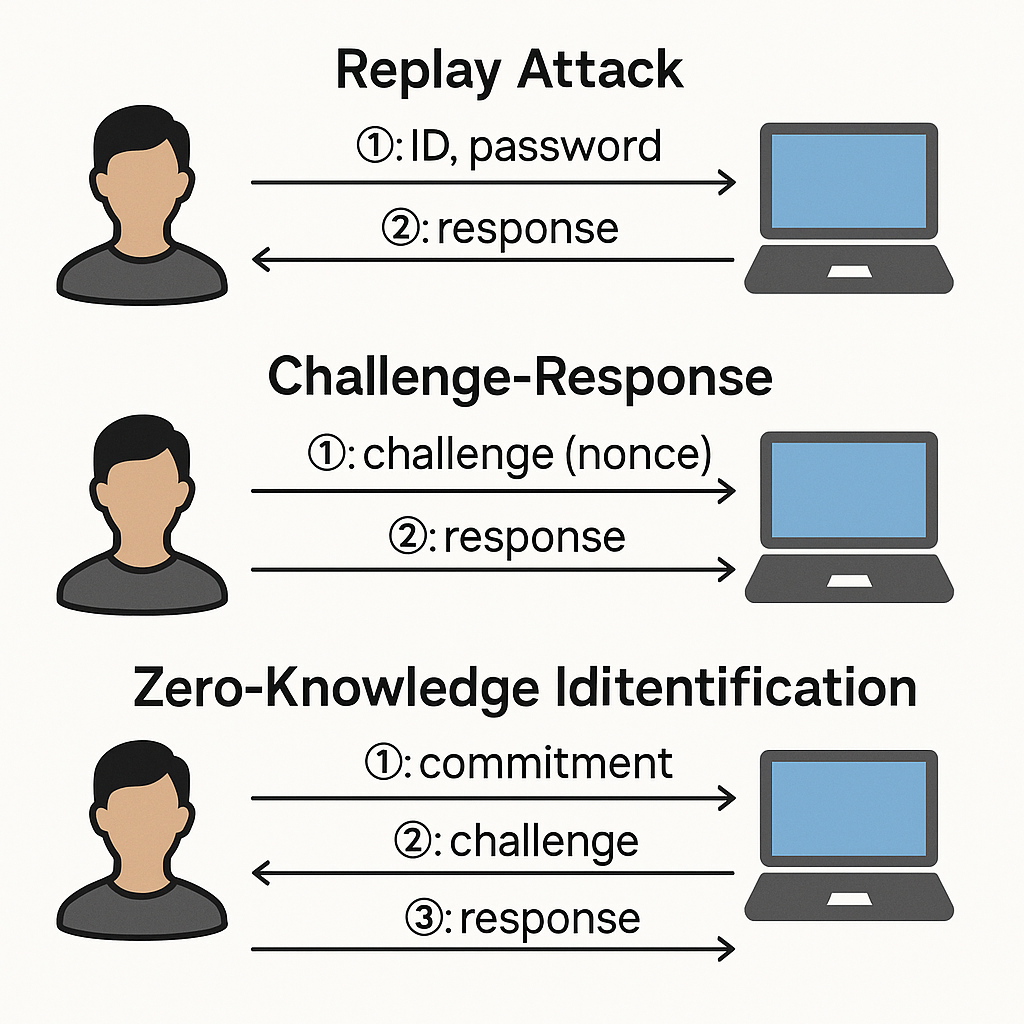

In [1]:
from IPython.display import Image

# 이미지 파일 경로 설정
image_path = 'replay_attack_challenge_response_ZNI.png'

# 이미지 출력
Image(filename=image_path)

---

## Q. 재전송 공격 방지하기 위해 timestamp는 왜 들어가나요?

### Response:

`timestamp`는 재전송 공격(replay attack)을 방지하기 위해 인증 메시지에 **"시간적 유효성"**을 부여하는 역할을 합니다. 아래에 이유를 정리해 드릴게요.

---

### ✅ 왜 `timestamp`가 재전송 공격 방지에 효과적인가?

### 📌 재전송 공격의 핵심

- 공격자는 과거의 **유효한 인증 메시지**를 도청해두었다가 나중에 다시 **그대로 재전송**함
- 서버가 이 메시지를 **새로운 요청으로 인식**하면 인증이 우회됨

### 💡 timestamp의 역할

1. **인증 요청에 시간 정보 포함**
    - 예: `요청 = (ID, 암호, timestamp)`
2. **서버는 요청 수신 시점과 timestamp 비교**
    - 현재 시간과 너무 차이 나면 **거부**
    - 일반적으로 ±5분, ±1분 등의 허용 오차 설정
3. **재전송 메시지는 과거 시간 포함이므로 거부됨**
    - 공격자가 과거의 timestamp 메시지를 보내면 서버가 "시간이 너무 오래됨"이라 판단하고 거부

---

### 🔐 예시

```
클라이언트 → 서버: ID, H(password + timestamp), timestamp
서버:
  - 현재 시간과 비교
  - timestamp가 유효 범위 내인지 확인
  - 해시값 검증
```

---

### ⚠️ 주의: timestamp만으로는 불충분한 경우도 있음

- 시스템 시간이 **동기화되지 않은 경우** (예: 클라이언트가 시간 조작)
- 따라서 보안성이 더 높은 경우에는 **nonce (무작위 수)** 와 함께 사용하거나,
- 또는 **세션 ID + timestamp + HMAC** 등 **복합 방식을 채택**

---

### 🧠 요약

| 방법 | 방지 원리 | 단점 |
| --- | --- | --- |
| timestamp | 메시지의 유효 기간 부여 | 시간 동기화 필요 |
| nonce | 매번 다른 난수로 인증 | 상태 유지 필요 (nonce 저장 등) |
| sequence number | 순차적 메시지 번호 확인 | 상태 유지 필요 |

---

👉 결론:

**timestamp는 인증 요청의 "기한"을 설정함으로써, 과거 메시지를 그대로 재사용하는 재전송 공격을 효과적으로 차단**할 수 있는 수단이에요.

하지만 단독 사용보단 nonce 등과 함께 쓰면 더 안전합니다.

---

## Nonce 개념 정리

 `nonce`는 보통 **보안 프로토콜**, **암호화 통신**, **인증 시스템** 쪽에서 주로 등장해서 일반적인 웹 개발 실무에서는 직접 다룰 일이 거의 없어요. 그래서 Nest, Spring, Next.js 같은 프레임워크 쓰면서도 **내부 구현에 숨어 있어서 모를 수 있어요**. 하지만 보안 시험이나 디지털 포렌식 분야에선 핵심 개념입니다.

---

## 🔐 Nonce란?

**Nonce**는 **number used once**, 즉 "한 번만 사용하는 수"라는 뜻이에요.

### 📌 목적

- 같은 메시지를 여러 번 보내더라도 **항상 다른 결과를 만들게 하기 위해**
- 즉, **재전송 공격 방지용 무작위 수**

---

## 📦 Nonce는 어떻게 쓰이나요?

### ✅ 1. Challenge-Response 인증에서

```
서버 → 클라이언트: nonce (랜덤한 도전값)
클라이언트 → 서버: HMAC(secret, nonce)
```

- 서버가 매번 **다른 nonce**를 보내기 때문에
- 공격자가 이전 응답을 **재전송해도 무용지물**

---

### ✅ 2. 블록체인에서

```
채굴할 때 nonce 값을 바꿔가며 해시값이 조건을 만족할 때까지 반복
→ POW(작업증명)에서 사용

```

---

### ✅ 3. 웹 애플리케이션에서 (간접적 활용)

- `CSP(Content Security Policy)`에서 **스크립트 태그에 nonce 속성** 붙여서 **인라인 스크립트 허용** (XSS 방지)

    ```html
    <script nonce="abc123">alert('Hello')</script>
    ```

- OAuth나 OpenID Connect의 **state**, **nonce** 파라미터는 CSRF와 replay 공격 방지용으로 내부 사용됨

---

## 👩‍💻 왜 Nest, Spring, Next에서는 잘 안 보였을까?

- 대부분 프레임워크나 라이브러리가 **자동으로 nonce를 생성하고 관리**해줘요
- 예를 들어:
    - Passport.js, Spring Security 등에서 내부적으로 CSRF 토큰, OAuth state 등에 nonce 기반 사용
    - 클라이언트가 구현하는 게 아니라 보안 로직이 감춰져 있어서 실무에서 드러나지 않음

---

## 📌 요약 정리표

| 항목 | 내용 |
| --- | --- |
| 정의 | 한 번만 사용하는 수 (number used once) |
| 목적 | 재전송 공격 방지, 응답 무효화 |
| 특징 | 랜덤 또는 순차적으로 생성되며 반복 사용 금지 |
| 등장 위치 | Challenge-Response, OAuth, CSP, 블록체인 |

---


## 시퀀스 번호

**Nonce(비표)**, **시퀀스 번호(Sequence Number)** — 실무에선 직접 안 써봤는데, 공무원 시험이나 보안시험에서는 꼭 외워야 하니까 더 짜증나는 용어들이죠.

---

## 🔢 시퀀스 번호 (Sequence Number)

### ✅ 정의

**시퀀스 번호**는 말 그대로 **메시지나 패킷의 순서를 번호로 매긴 것**이에요.

- 1, 2, 3, 4, 5… 이런 식으로 증가

---

### 🔐 재전송 공격 방지에 어떻게 사용되나요?

### 💡 아이디어:

- 클라이언트가 메시지를 보낼 때마다 번호를 붙여서 전송
- 서버는 **마지막으로 받은 시퀀스 번호보다 큰 값만 수락**
- 과거에 썼던 시퀀스 번호 메시지를 다시 보내면? → **무시함**

### ✅ 예시

```
[현재 서버는 클라이언트 A의 시퀀스 번호 100까지 받음]

클라이언트 A → 서버: "login 요청", seq=101  ✅ 수락

공격자 → 서버: "login 요청", seq=100  ❌ 거절 (이미 받은 번호)
```

---

### 🔁 시퀀스 번호 vs Nonce vs Timestamp 비교

| 구분 | 시퀀스 번호 | Nonce (비표) | Timestamp |
| --- | --- | --- | --- |
| 의미 | 순차적 번호 | 임의 난수 | 현재 시간 |
| 사용 예 | TCP, IPSec | 인증 토큰, ZKP | Kerberos, 인증서 |
| 상태 유지 | ✅ 필요함 | ❌ 불필요 (보통 stateless) | ❌ (단, 시계 동기화 필요) |
| 재전송 방지 | ✅ 가능 | ✅ 가능 | ✅ 가능 |
| 단점 | 순서 꼬이면 문제 | 난수 중복 피해야 | 시계 동기화 필요 |

---

## 🤔 "Nonce = 비표" 라는 용어?

- **비표(秘標)**: 한국어 번역어로 "비밀로 사용되는 표식"이라는 뜻인데…

    → 그냥 **임의의 무작위 수**라고 기억하세요.

- 솔직히 실무자 입장에서는 "랜덤 토큰"이 더 직관적이죠.

---

## 🧠 시험 암기 팁

- **Nonce = 매번 다른 난수 (비표)**
- **시퀀스 번호 = 순차적 번호로 메시지 위변조 방지**
- **Timestamp = 시간 기반 유효성 체크**

---

**공무원 시험 문제**에서 말하는 **시퀀스 번호**는 대부분 **TCP/IP 프로토콜의 시퀀스 번호**를 기반으로 하는 경우가 많습니다. 실무자 입장에서는 익숙할 수 있는데, **보안 개념이나 인증 맥락으로 나오면** 갑자기 뜬금없어 보일 수 있죠.

---

## 📶 TCP 3-Way Handshake에서의 시퀀스 번호 (Sequence Number)

### 🧩 구조

```
1. 클라이언트 → 서버 : SYN, seq = x
2. 서버 → 클라이언트 : SYN-ACK, seq = y, ack = x+1
3. 클라이언트 → 서버 : ACK, seq = x+1, ack = y+1
```

- `seq`는 내가 보내는 데이터의 시작 번호
- `ack`는 **상대방의 seq + 1** → 내가 받을 데이터의 기대 번호

---

## 💥 시퀀스 번호의 보안 역할

| 보안 기능 | 설명 |
| --- | --- |
| ✅ 패킷 순서 추적 | 데이터가 순서대로 도착했는지 확인 가능 |
| ✅ 중복 감지 | 이미 받은 번호의 패킷은 무시 |
| ✅ 재전송 방지 | 이전 seq 번호로 온 패킷은 discard |
| ✅ 세션 하이재킹 방어 | 공격자가 예상 불가능한 seq 번호를 사용해야 성공 가능 (랜덤 초기 seq 사용) |

---

## 🔐 인증에서의 시퀀스 번호 vs TCP의 시퀀스 번호

| 항목 | 인증용 시퀀스 번호 | TCP 시퀀스 번호 |
| --- | --- | --- |
| 사용 목적 | 인증 메시지 재사용 방지 | 데이터 전송의 순서 관리 |
| 상태 유지 | 클라이언트별 마지막 번호 저장 | 커넥션별 번호 관리 |
| 위협 방지 | replay 공격 차단 | 세션 하이재킹, 중복 패킷 제거 |

---

## 🧠 시험 연계 암기 팁

- `시퀀스 번호` = 순차적 번호로 **재전송 공격 방지**
- `TCP`에서도 사용되며, **재전송·중복 방지, 순서 보장** 기능 수행
- `공시 문제`에서 나오면 → **“순차적 전송을 보장하며 재전송 공격 방지 가능”**이라고 정리

---

## 메시지에 송신자의 개인키로 서명한 전자서명을 포함하여 전송한다.  => 이건 왜 틀린 보기?

## 🔍 문장 다시 보기:

> “메시지에 송신자의 개인키로 서명한 전자서명을 포함하여 전송한다.”
>

이게 왜 틀릴까요? 핵심은 바로 **전자서명은 무결성과 인증을 위한 용도지, 재전송 공격 방지와는 직접적인 관계가 없다**는 점입니다.

---

## ✅ 전자서명은 맞는 방식이지만…

| 항목 | 설명 |
| --- | --- |
| 서명자 | 송신자 (Sender)의 개인키로 서명 |
| 검증자 | 수신자는 송신자의 공개키로 서명 검증 |
| 기능 | 무결성 보장 + 서명자 신원 인증 (부인방지) |
| ❌ 한계 | **재전송 공격은 막지 못함** (누가 보냈든 유효하면 끝) |

→ 즉, 이 문장은 **기술적으로는 가능한 구조**지만, **재전송 공격을 막기 위한 조치로는 부적절**해서 "틀린 보기"가 되는 거예요.

---

## 🔁 왜 전자서명으로는 재전송 공격 못 막나요?

전자서명은 **같은 메시지를 동일하게 서명**하면,

→ 재전송해도 유효한 서명으로 계속 인식됩니다.

예시:

```
A → B : {메시지, 전자서명(개인키로 서명된 메시지)}
공격자 E: 이전 메시지 통째로 재전송
→ B는 여전히 유효한 전자서명이라 인식함 ✅
```

→ **Timestamp, Nonce 같은 동적 값이 없다면 방어 불가**

---

## 🧠 시험 암기 포인트 요약

| 보기 문장 | 맞음/틀림 | 이유 |
| --- | --- | --- |
| 송신자 개인키로 서명하여 메시지를 보낸다 | ✅ 전자서명 구조상 맞음 |  |
| 전자서명을 이용해 재전송 공격을 방지한다 | ❌ 방어 못함 |  |
| Nonce를 포함시켜 재전송 공격을 방지한다 | ✅ 맞는 구조 |  |
| 메시지에 전자서명만 포함하면 재전송 공격을 방지할 수 있다 | ❌ 틀림, 동적요소 없음 |  |

---

💡 **시험에서 이런 거 외우는 팁**:

- "전자서명 = 인증 + 무결성 (부인방지)"
- "재전송 공격 방지 = **timestamp, nonce, seq** 필요"
- 전자서명은 **정적 정보**라서 재전송 공격 자체를 막는 용도는 아님!

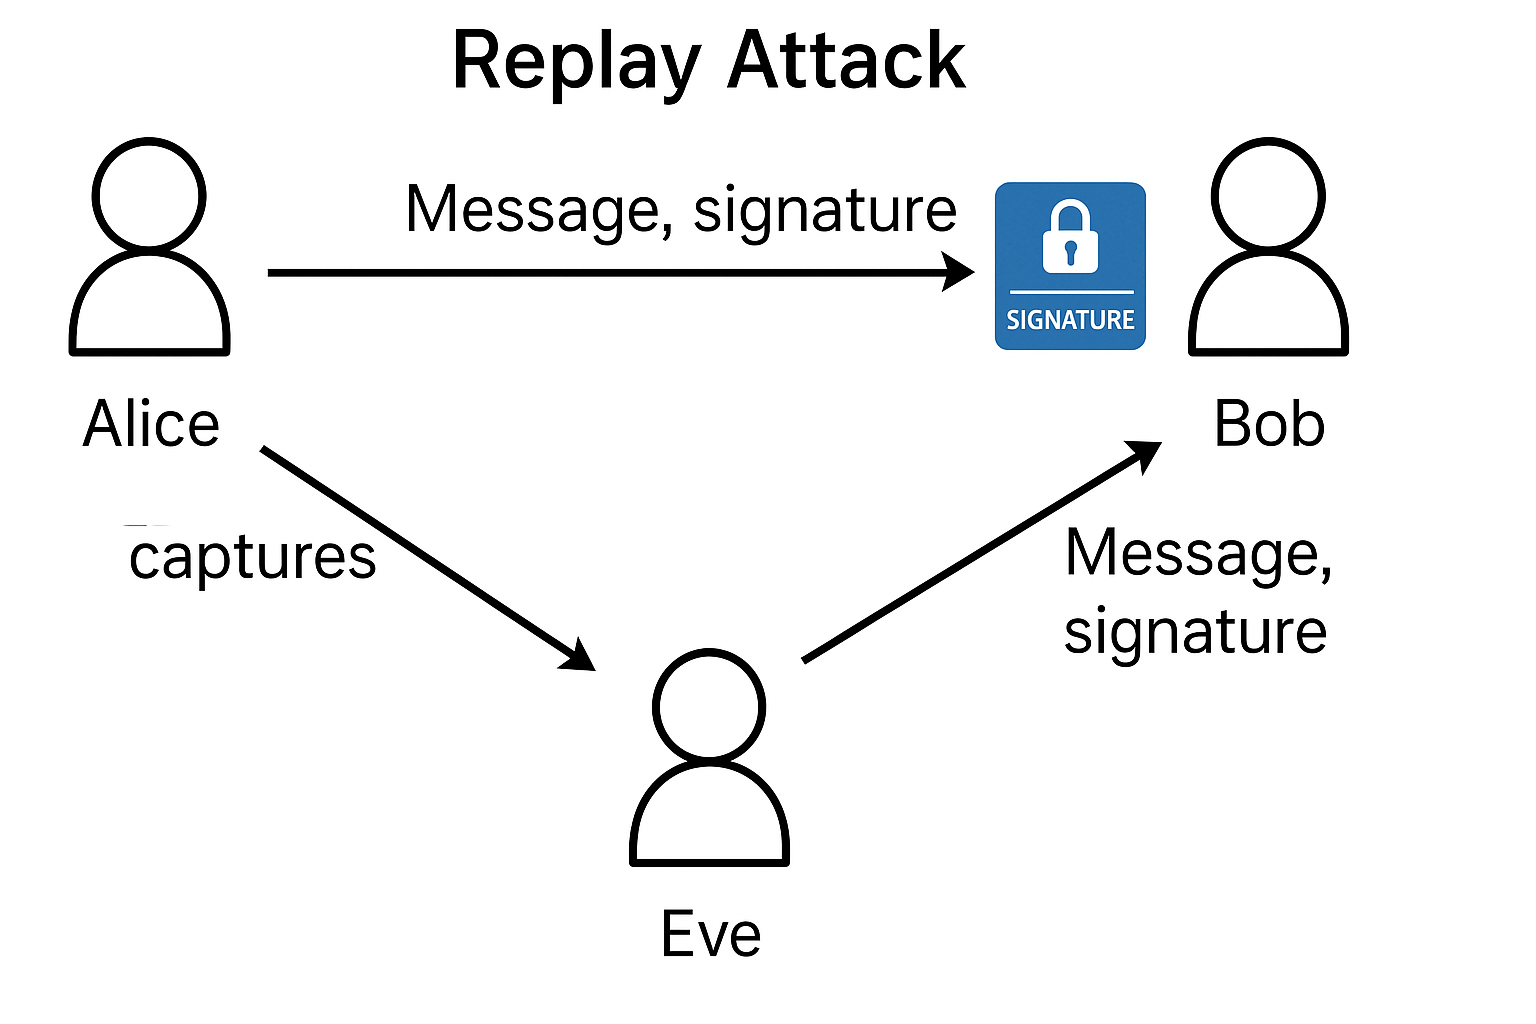

In [2]:
from IPython.display import Image

# 이미지 파일 경로 설정
image_path = 'DS_replay_attack.png'

# 이미지 출력
Image(filename=image_path)

---

## **"재전송 공격 방지를 위해 사용자 식별자를 포함하지 않는다"**

→ 얼핏 보면 맞는 말 같고, 또 어떤 기출에는 반대로 나오기도 하죠.

---

## ✅ 결론부터 말하자면:

> ❌ 재전송 공격 방지를 위해 ‘사용자 식별자’를 생략하는 건 아님.
>
>
> → **사용자 식별자는 포함해도 되며**,
>
> → **재전송 공격은 그것과 무관하게 timestamp, nonce, 시퀀스 번호 등으로 방지하는 것!**
>

---

## 🔍 왜 오답인가요?

| 항목 | 설명 |
| --- | --- |
| 사용자 식별자 (ID 등) | 클라이언트를 식별하기 위한 정보 |
| 재전송 공격 | 도청된 인증 메시지를 재전송하여 인증 우회 |
| 방지 방법 | nonce / timestamp / 시퀀스 번호 사용 |
| ✅ 핵심 | 동일한 메시지를 다시 보내도 무효화할 **동적 요소**가 있어야 함 |

→ 사용자의 ID를 빼는 건 **보안 강화가 아니라 오히려 시스템 설계에 혼란**을 줍니다.

---

## 🧠 이해를 돕는 예시

```
A → S : ID_A, H(PW || timestamp), timestamp
```

- `ID_A`가 사용자 식별자예요
- 누군지 알아야 서버도 timestamp 확인하고 HMAC도 검증하죠
- 오히려 **ID가 없으면** “누구에 대한 인증인지”조차 확인이 안 됨

---

## ✅ 시험용 정리

| 보기 유형 | 맞는지? | 해설 |
| --- | --- | --- |
| 사용자 식별자를 생략함으로써 재전송 공격을 방지한다 | ❌ | 방지는 timestamp, nonce, seq로 함 |
| timestamp를 이용하여 인증 메시지의 유효시간을 제한한다 | ✅ | 시간 기반 방어 |
| 시퀀스 번호를 이용하여 동일 메시지 반복을 방지한다 | ✅ | 순차 번호 추적 |
| nonce를 이용해 매 요청을 구별한다 | ✅ | 무작위 수로 유일성 보장 |

---

진짜 공시 문제 중에는 이런 거 **의도적으로 말장난**처럼 만들어서 "생략"이 마치 방어처럼 보이게 하는 경우 많아요. 실무자 출신이면 더더욱 헷갈릴 수 있습니다 😮‍💨

그럴 땐 “식별 정보는 남기되, **동적 요소(Nonce, Timestamp)**로 공격을 막는다”는 기준으로 정리하면 됩니다!